**Lab 5: FIR Filtering 2**

The goal of this lab is to study the response of FIR filters to inputs such as complex exponentials and sinusoids. In the experiments of this lab, you will use `np.convolve()` to implement filters and `freqz()` to obtain the filter’s frequency response. As a result, you should learn how to characterize a filter by knowing how it reacts to different frequency components in the input.
This lab also introduces two practical filters: bandpass filters and nulling filters.
Bandpass filters can be used to detect and extract information from complex signals,
e.g., tones in a touch-tone telephone dialer. Nulling filters can be used to remove
sinusoidal interference, e.g., jamming signals in a radar.

In [1]:
import os
import numpy as np
import librosa
import IPython.display as ipd
from scipy import signal
import matplotlib.pyplot as plt

from util import load_audio, plot_signals, plot_spectrogram, plot_mean_spectrogram

In [2]:
def averaging_filter(x, N):
    h = np.ones(N) / N
    y = np.convolve(x, h, mode='same')
    return y

def envelope(x, N): 
    rectified = np.abs(x)
    envelope = averaging_filter(rectified, N)
    return envelope

filepath = "./sis1_group103/e1pluck.wav"
ref, fs = load_audio(filepath)
enveloped_ref = envelope(ref, 900)
scale = 1.4
enveloped_ref_scaled = enveloped_ref * scale

weights = [1, 0.5234, 0.3644, 0.0449, 0.0290, 0.3463, 0.1484, 0.1222, 0.0299, 0.0362]

def synthesize(f0, phi, Ak, t):
  y = 0
  for k in range(1, len(Ak) + 1):
    y += Ak[k-1] * np.cos(2*np.pi*k*f0*t + k*phi - (k-1)*np.pi/2)
  return y

N_samples = len(enveloped_ref_scaled)
t = np.arange(N_samples) / fs
synt = synthesize(329.10, 4.75, weights, t=t)

enveloped_synt = enveloped_ref_scaled * synt


In [3]:
print("reference:")
plot_signals([ref], sr=fs, t_start=0, t_end=3, name = ['reference']) 
print("enveloped synthesis:")
plot_signals([enveloped_synt], sr=fs, t_start=0, t_end=3, name = ['enveloped synt'])

reference:


enveloped synthesis:


---

**2. Averaging filter**

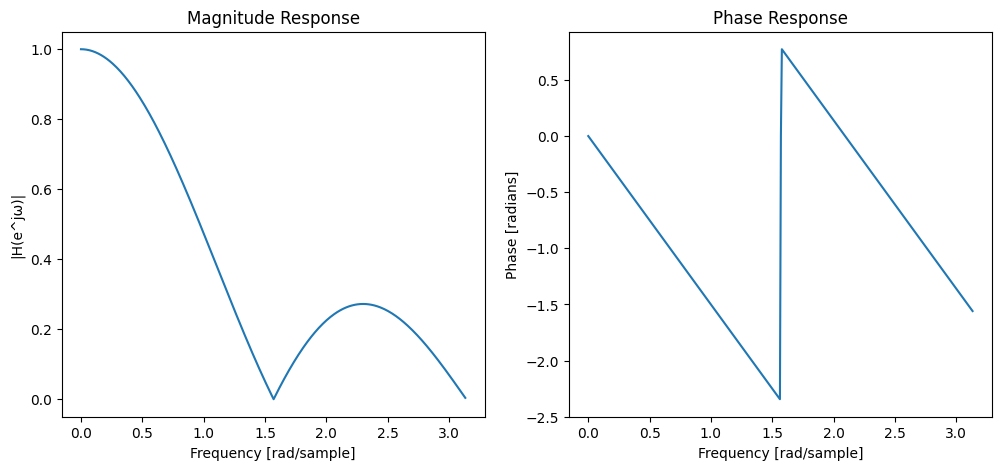

In [4]:
from scipy.signal import freqz

N = 4
h = np.ones(N)/N  # 4-point averaging filter

w, H = freqz(h, worN=400)  

plt.figure(figsize=(12,5))

# magnitude 
plt.subplot(1,2,1)
plt.plot(w, np.abs(H))
plt.title('Magnitude Response')
plt.xlabel('Frequency [rad/sample]')
plt.ylabel('|H(e^jω)|')

# phase 
plt.subplot(1,2,2)
plt.plot(w, np.angle(H))
plt.title('Phase Response')
plt.xlabel('Frequency [rad/sample]')
plt.ylabel('Phase [radians]')

plt.show()


2.1 Use the `freqz` and `plot_frequency_response` functions to plot the frequency response of the averaging filter of your envelope function.



In [5]:
from util import plot_frequency_response     # given by your lab

# 900 point averaging filter used in the envelope
N = 900
h = np.ones(N) / N

# calculate frequency response
w, H = freqz(h, 1, worN=1000)

# Plot the frequency response directly
plot_frequency_response(w, H)
